In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
# pd.set_option('Display.max_rows',None)

In [72]:
data=pd.read_csv('Company_Data.csv')

In [73]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [74]:
# checked the data types are correct and is there any null values in dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [75]:
data['Sales'].describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

In [76]:
data['Sales']=data['Sales'].apply(lambda x:0 if x>7.49 else 1)

In [77]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0,138,73,11,276,120,Bad,42,17,Yes,Yes
1,0,111,48,16,260,83,Good,65,10,Yes,Yes
2,0,113,35,10,269,80,Medium,59,12,Yes,Yes
3,1,117,100,4,466,97,Medium,55,14,Yes,Yes
4,1,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,0,138,108,17,203,128,Good,33,14,Yes,Yes
396,1,139,23,3,37,120,Medium,55,11,No,Yes
397,1,162,26,12,368,159,Medium,40,18,Yes,Yes
398,1,100,79,7,284,95,Bad,50,12,Yes,Yes


In [78]:
data0=data.drop('Sales',axis=1)

In [79]:
# we used one hot encoder to convert categorical data into numerical data
data1=pd.get_dummies(data0)
data1.head(3)

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1


In [80]:
# we splited into x for featuers and y for target
x=data1
y=data.iloc[:,[0]]

In [81]:
data.shape

(400, 11)

# we check which segement/attributes causes high sale

In [82]:
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

In [83]:
# to get best/important features from all features we use kbest function
k_best=SelectKBest(score_func=f_regression)
values=k_best.fit(x,y)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [84]:
from numpy import set_printoptions

In [85]:
set_printoptions(precision=2)
print(values.scores_)

[ 0.5   6.16 26.97  1.92 72.38 14.38  0.33 33.38 60.47  1.43  0.88  0.88
  8.26  8.26]


In [86]:
# after getting all features impotance values then we converted into datafarme for better understanding  
score=pd.DataFrame(values.scores_)

In [87]:
data2=data1

In [88]:
# then we inserted main datasets features name into score to unserstanding which velue belongs to which feature
score.index=data2.columns

In [89]:
score

,0
CompPrice,0.504411
Income,6.160349
Advertising,26.967823
Population,1.922096
Price,72.382168
Age,14.375192
Education,0.331481
ShelveLoc_Bad,33.379382
ShelveLoc_Good,60.468510
ShelveLoc_Medium,1.428189


<!-- as per the score company high sales are ausesing high sales are 
1=ShelveLoc_Good- 133
2=Price- 98
3=ShelveLoc_Bad- 72
4=Advertising- 31
5=Age- 22
6=US- 12
 -->

In [90]:
# so we checked the which segement/attributes causes high sale to A cloth manufacturing company
# 1-ShelveLoc_Good- 133
# 2-Price- 98
# 3-ShelveLoc_Bad- 72
# 4-Advertising- 31
# 5-Age- 22
# 6-US- 12

<Figure size 1440x360 with 0 Axes>

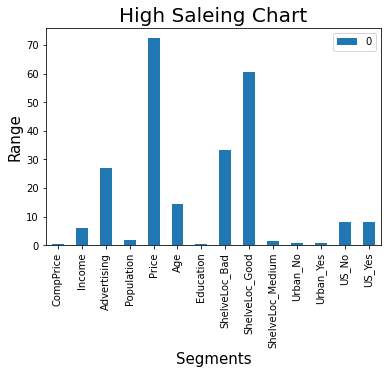

In [91]:
# i ploted barplot so client can understand easily which segment or atributes are cousing high sale to the compony
plt.figure(figsize=(20,5))
score.plot(kind='bar')
plt.xlabel('Segments',fontsize=15)
plt.ylabel('Range',fontsize=15)
plt.title('High Saleing Chart', fontsize=20)
plt.show()

# now we are using random forest to build our model

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
# then we splited into train and test set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [111]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [105]:
# then used random forest algorithm
r_f_c=RandomForestClassifier(random_state=42,bootstrap=True)
params={'n_estimators':[100,200,300]}
model=GridSearchCV(r_f_c,param_grid=params,cv=20,)
model.fit(x_train,y_train)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was pa

C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was pa

C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:910: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=20, estimator=RandomForestClassifier(random_state=42),
             param_grid={'n_estimators': [100, 200, 300]})

In [106]:
model.best_params_

{'n_estimators': 100}

In [107]:
model.best_score_

0.8258241758241759

In [108]:
model.score(x_train,y_train)

1.0

In [110]:
y_pred=model.predict(x_test)

In [113]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81        75
           1       0.75      0.77      0.76        57

    accuracy                           0.79       132
   macro avg       0.78      0.79      0.78       132
weighted avg       0.79      0.79      0.79       132

